In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [186]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [87]:
train = pd.read_csv("C:\\Users\\ssriva\\Desktop\\Great_Lakes_fromOfficce\\Datasets\\simplifiedhuarus\\train.csv")
test = pd.read_csv("C:\\Users\\ssriva\\Desktop\\Great_Lakes_fromOfficce\\Datasets\\simplifiedhuarus\\test.csv")

In [88]:
train.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [89]:
test.head()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,3,0.280,-0.0195,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,5,0.277,-0.0166,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,9,0.277,-0.0218,-0.121,-0.997,-0.961,-0.984,-0.998,-0.957,-0.984,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,17,0.279,-0.0148,-0.117,-0.997,-0.982,-0.983,-0.997,-0.982,-0.981,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,26,0.279,-0.0145,-0.107,-0.998,-0.986,-0.993,-0.998,-0.985,-0.995,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294


In [90]:
# Save the labels separately and drop rn and activity columns from train dataset

labels = train['activity'].copy()
label_keys = np.array(labels.unique())
print('Activity labels: ' + str(label_keys))

Activity labels: ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [91]:
train.drop(['rn','activity'], axis=1,inplace=True)
test.drop('rn',axis=1, inplace=True)

In [92]:
# check for missing values
all(train.isnull().sum())    

False

In [119]:
# Normalize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train)
y_scaled = scaler.fit_transform(test)

<h1>Clustering Analysis using K-means</h1>

In [121]:
# check for the optimum k value
k_range = range(1,10)
inertias=[]
for k in k_range:
    model = KMeans(n_clusters = k)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

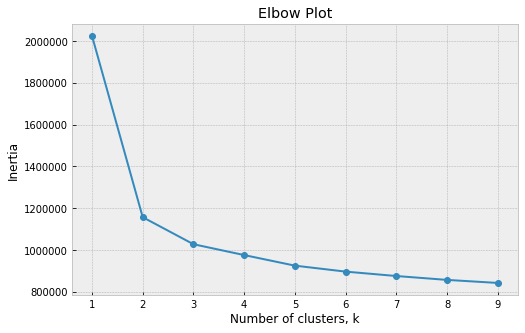

In [192]:
# plot inertia vs the k values range - Elbow plot    
plt.figure(figsize=(8,5))
plt.title("Elbow Plot")
plt.style.use('bmh')
plt.plot(k_range, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

In [130]:
k_means = KMeans(n_clusters=2, random_state=123, n_init=30)
k_means.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [131]:
predicted_train = pd.DataFrame({"predicted_labels":k_means.labels_,"original_labels": labels.tolist()}).head(50)

In [132]:
predicted_train.head(50)

,predicted_labels,original_labels
0,0,STANDING
1,0,STANDING
2,0,STANDING
3,0,STANDING
4,0,STANDING
5,0,STANDING
6,0,STANDING
7,0,STANDING
8,0,SITTING
9,0,SITTING


<h3>The clustering algorithm has predicted 2 classes of activites</h3>
<ol>
    <li>0 - Not Moving</li>
    <li>1 - Moving</li>
</ol>

In [140]:
# predict for the test set
pred_labels = k_means.predict(y_scaled)

In [141]:
# Evaluate Model
print("Training score: "+str(silhouette_score(X_scaled, k_means.labels_)))
print("Test score: "+str(silhouette_score(y_scaled, pred_labels)))

Training score: 0.38990168994287766
Test score: 0.40032398500421484


In [184]:
# Reduce the dimensions of the input dataset 
X_reducedKmeans = k_means.transform(X_scaled)
X_reducedKmeans.shape

(3609, 2)

<h3>Mini Batch KMeans</h3>

In [154]:
mbKMeans = MiniBatchKMeans(n_clusters=2)
X_labeled = mbKMeans.fit_predict(X_scaled)
y_labeled = mbKMeans.predict(y_scaled)

In [155]:
# Evaluate Model - MiniBatchKMeans
print("Training score: "+str(silhouette_score(X_scaled, X_labeled)))
print("Test score: "+str(silhouette_score(y_scaled, y_labeled)))

Training score: 0.3898938722126897
Test score: 0.40032398500421484


<h1>PCA</h1>

In [156]:
#check for optimal number of features
pca = PCA(random_state=123)
pca.fit(X_scaled)
features = range(pca.n_components_)

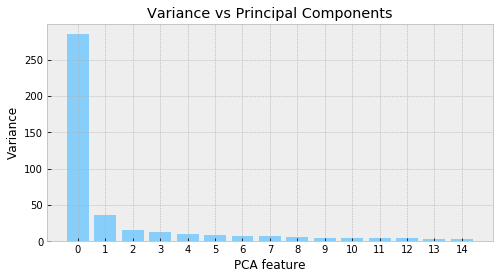

In [191]:
plt.figure(figsize=(8,4))
plt.title("Variance vs Principal Components")
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [180]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=123)
    global Data_reduced
    Data_reduced  = pca.fit_transform(X_scaled)
    print("'Shape of the new Data df: " + str(Data_reduced.shape))

In [182]:
# Since the first principle component seems to contain most of the variance, we set n_components
pca_transform(n_comp=1)

'Shape of the new Data df: (3609, 1)


In [190]:
Data_reduced

array([[-15.14315696],
       [-14.54146473],
       [-16.22468416],
       ...,
       [  8.67705607],
       [  7.72533318],
       [ 15.63341286]])

In [183]:
# method 2 to do pca (The 0.95 means that we require 95% variance in the reduced dataset)
pca2 = PCA(0.95)
reduced_X = pca2.fit_transform(X_scaled)
reduced_X.shape

(3609, 102)

<p>In order to include 95% variance, we would have to have 102 dimensions as per the above</p>

<h3>Incremental PCA</h3>

In [189]:
Ipca = IncrementalPCA(n_components=1)
n_batches = 100
for X_batch in np.array_split(X_scaled, n_batches):
    Ipca.partial_fit(X_scaled)
X_reducedIpca = Ipca.transform(X_scaled)
X_reducedIpca.shape

(3609, 1)

<h2>Combining PCA and KMeans Clustering</h2>

In [203]:
pca = PCA(n_components=1)
data_reduced = pca.fit_transform(X_scaled)
data_reduced_y = pca.fit_transform(y_scaled)
k_means = KMeans(n_clusters=2, random_state=123, n_init=30)

In [204]:
k_means.fit(data_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [207]:
pred = k_means.predict(data_reduced_y)

In [209]:
# Evaluate Model
print("Training score: "+str(silhouette_score(data_reduced, k_means.labels_)))
print("Test score: "+str(silhouette_score(data_reduced_y, pred)))

Training score: 0.7941361821630083
Test score: 0.8099024078639874


In [210]:
# The silhouette score has improved for both train and test datasets by more than 100%